In [38]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_diabetes = pd.read_csv("diabetes.csv")
df_kidney = pd.read_csv("kidney_disease.csv")
df_heart = pd.read_csv("heart.csv")

In [103]:
df_kidney.rename(columns={
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'classification': 'class'  # Target column
}, inplace=True)


In [50]:
# Function to perform ANOVA test for a given dataset
def perform_anova(df, numerical_features, target_column):
    print(f"\nPerforming ANOVA Test for {target_column}...\n")
    for feature in numerical_features:
        # Group the data by the target variable and extract the feature values
        groups = [df[df[target_column] == group][feature] for group in df[target_column].unique()]
        
        # Perform ANOVA test
        f_statistic, p_value = stats.f_oneway(*groups)
        
        print(f"ANOVA Test for {feature}:")
        print(f"F-statistic: {f_statistic}")
        print(f"P-value: {p_value}")
        
        # Interpret the results
        if p_value < 0.05:
            print(f"There is a significant difference in {feature} between the groups (Reject H0).\n")
        else:
            print(f"There is no significant difference in {feature} between the groups (Fail to reject H0).\n")

In [63]:
diabetes_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
diabetes_target = 'Outcome'

kidney_features = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
    'potassium', 'haemoglobin', 'packed_cell_volume',
    'white_blood_cell_count', 'red_blood_cell_count'
]

kidney_target = 'class'


heart_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_target = 'target'


In [64]:
# Convert all columns to numeric where possible, replacing errors with NaN
df_kidney[kidney_features] = df_kidney[kidney_features].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_kidney.dropna(subset=kidney_features + [kidney_target], inplace=True)


In [65]:
# Perform ANOVA for each dataset
perform_anova(df_diabetes, diabetes_features, diabetes_target)


Performing ANOVA Test for Outcome...

ANOVA Test for Pregnancies:
F-statistic: 39.670227393616074
P-value: 5.065127298052554e-10
There is a significant difference in Pregnancies between the groups (Reject H0).

ANOVA Test for Glucose:
F-statistic: 213.1617521780386
P-value: 8.935431645287658e-43
There is a significant difference in Glucose between the groups (Reject H0).

ANOVA Test for BloodPressure:
F-statistic: 3.2569503978889918
P-value: 0.07151390009774597
There is no significant difference in BloodPressure between the groups (Fail to reject H0).

ANOVA Test for SkinThickness:
F-statistic: 4.304380905008434
P-value: 0.03834770482048333
There is a significant difference in SkinThickness between the groups (Reject H0).

ANOVA Test for Insulin:
F-statistic: 13.281107531096268
P-value: 0.0002861864603602735
There is a significant difference in Insulin between the groups (Reject H0).

ANOVA Test for BMI:
F-statistic: 71.77207210224542
P-value: 1.2298074873114397e-16
There is a signifi

Significant Differences:

Pregnancies, Glucose, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age show significant differences between the groups (p-value < 0.05).

No Significant Difference:

BloodPressure does not show a significant difference (p-value > 0.05).

In [66]:
# Perform ANOVA for each dataset
perform_anova(df_heart, heart_features, heart_target)


Performing ANOVA Test for target...

ANOVA Test for age:
F-statistic: 16.11669982318829
P-value: 7.52480130344234e-05
There is a significant difference in age between the groups (Reject H0).

ANOVA Test for trestbps:
F-statistic: 6.458168674005331
P-value: 0.011546059200233487
There is a significant difference in trestbps between the groups (Reject H0).

ANOVA Test for chol:
F-statistic: 2.2029834463803746
P-value: 0.13879032695601218
There is no significant difference in chol between the groups (Fail to reject H0).

ANOVA Test for thalach:
F-statistic: 65.12010440125097
P-value: 1.6973376386560998e-14
There is a significant difference in thalach between the groups (Reject H0).

ANOVA Test for oldpeak:
F-statistic: 68.5514394103071
P-value: 4.085346391354598e-15
There is a significant difference in oldpeak between the groups (Reject H0).



Significant Differences:

age, trestbps (blood pressure), thalach (maximum heart rate), and oldpeak (ST depression) show significant differences between the groups (p-value < 0.05).

No Significant Difference:

chol (cholesterol) does not show a significant difference (p-value > 0.05).

In [70]:
perform_anova(df_kidney, kidney_features, kidney_target)


Performing ANOVA Test for class...

ANOVA Test for age:
F-statistic: 30.09412442958915
P-value: 1.229123052922035e-07
There is a significant difference in age between the groups (Reject H0).

ANOVA Test for blood_pressure:
F-statistic: 35.43048654737712
P-value: 1.1603132480458699e-08
There is a significant difference in blood_pressure between the groups (Reject H0).

ANOVA Test for specific_gravity:
F-statistic: 309.9690577596871
P-value: 1.3630437167062844e-42
There is a significant difference in specific_gravity between the groups (Reject H0).

ANOVA Test for albumin:
F-statistic: 274.37217222432736
P-value: 1.9811007953918485e-39
There is a significant difference in albumin between the groups (Reject H0).

ANOVA Test for sugar:
F-statistic: 55.38223248529544
P-value: 2.8384416296346355e-12
There is a significant difference in sugar between the groups (Reject H0).

ANOVA Test for blood_glucose_random:
F-statistic: 72.75775978099652
P-value: 3.529382123269386e-15
There is a signific

Significant Differences:

age, blood_pressure, specific_gravity, albumin, sugar, blood_glucose_random, blood_urea, serum_creatinine, sodium, haemoglobin, packed_cell_volume, white_blood_cell_count, and red_blood_cell_count show significant differences between the groups (p-value < 0.05).

No Significant Difference:

potassium does not show a significant difference (p-value > 0.05).

In [76]:
import math

# Function to plot boxplots for a given dataset
def plot_boxplots(df, numerical_features, target_column):
    num_features = len(numerical_features)
    num_cols = 3  
    num_rows = math.ceil(num_features / num_cols)  # Calculate the required number of rows

    plt.figure(figsize=(15, 5 * num_rows))  
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(num_rows, num_cols, i) 
        sns.boxplot(x=target_column, y=feature, data=df)
        plt.title(f'Boxplot of {feature} by {target_column}')

    plt.tight_layout()
    plt.show()

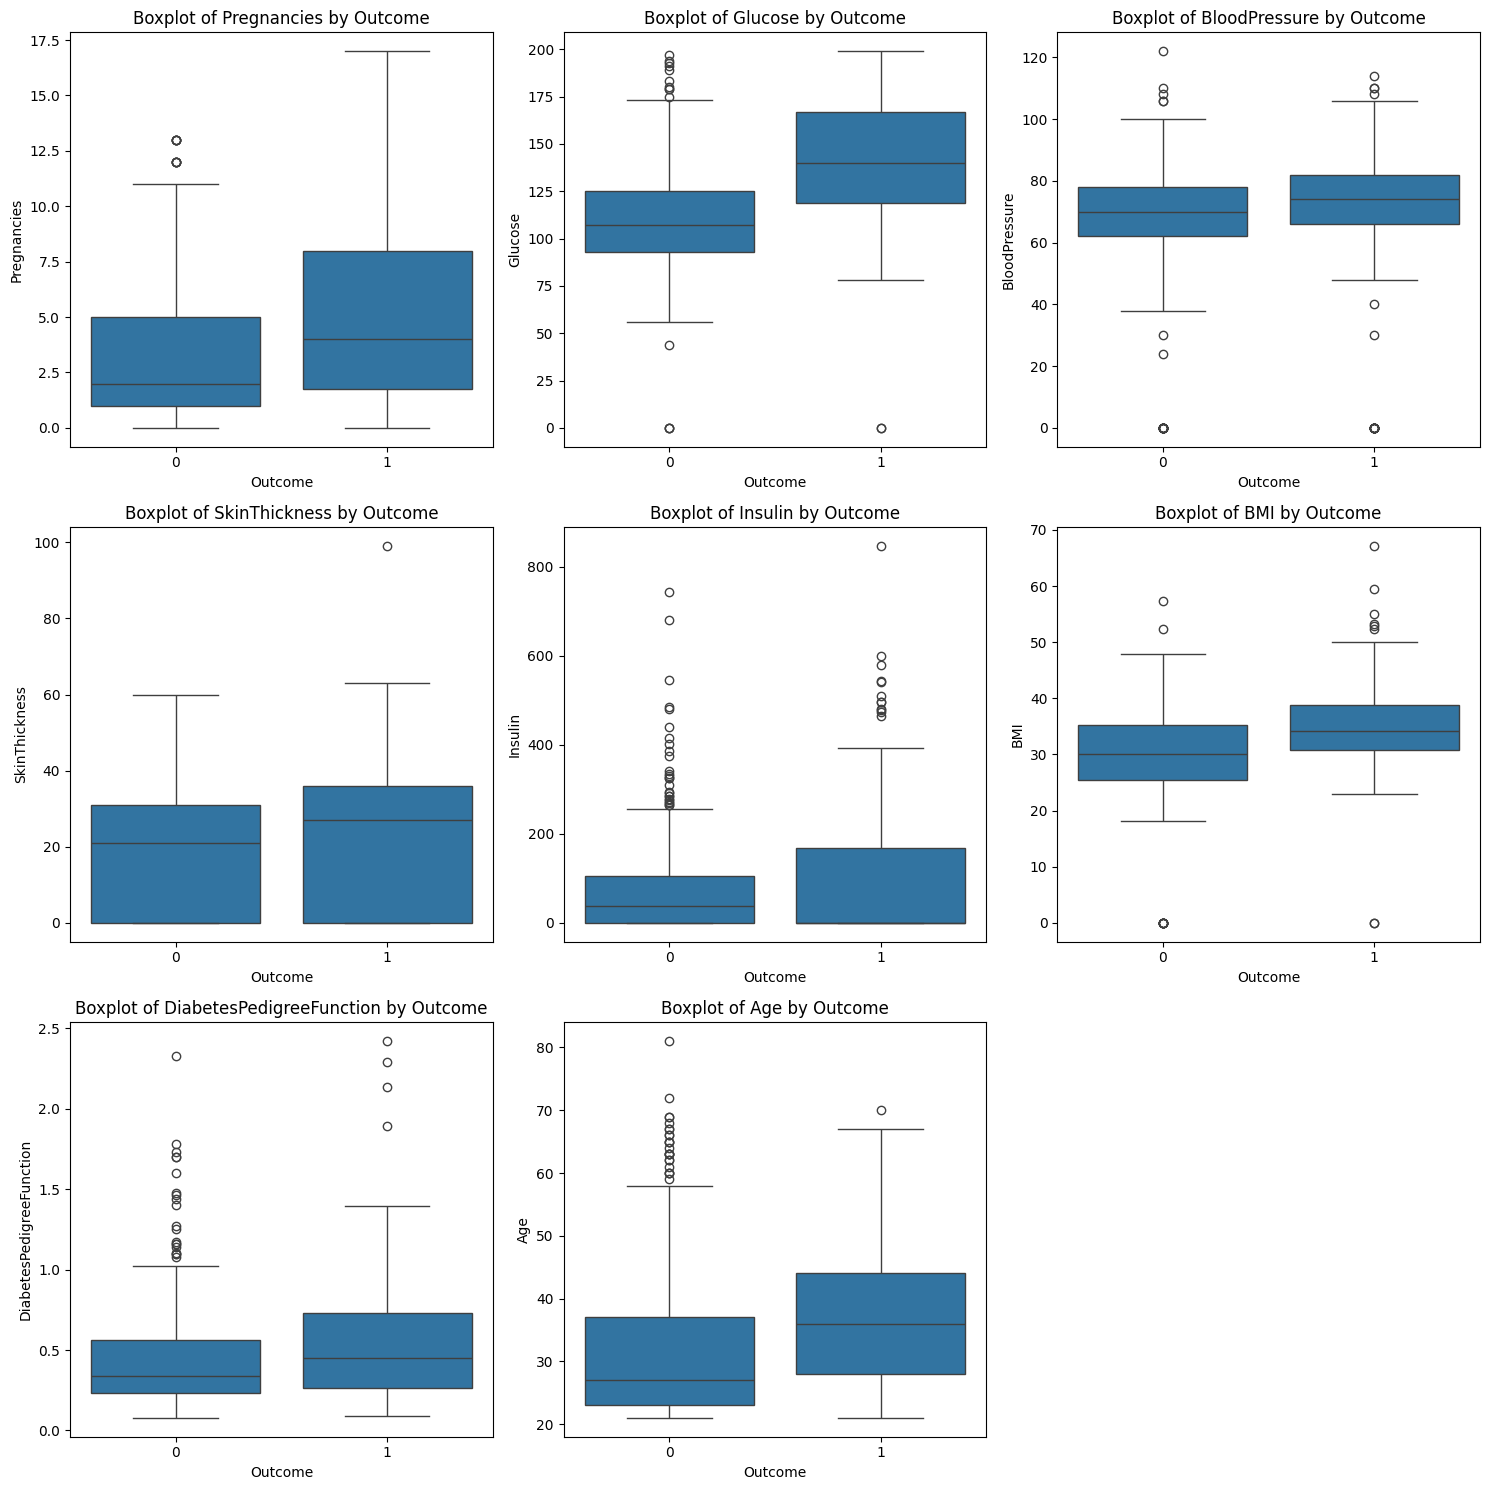

In [77]:
# Plot boxplots for each dataset
plot_boxplots(df_diabetes, diabetes_features, diabetes_target)

1. Boxplot of Pregnancies by Outcome
Variable: Number of pregnancies.
Observation: Patients with diabetes (Outcome = 1) tend to have a higher median number of pregnancies compared to those without diabetes (Outcome = 0). There are several outliers in both groups.
2. Boxplot of Glucose by Outcome
Variable: Glucose levels.
Observation: Patients with diabetes (Outcome = 1) have significantly higher glucose levels compared to those without diabetes (Outcome = 0). The distribution for Outcome = 1 is shifted upward, with some outliers present.
3. Boxplot of Blood Pressure by Outcome
Variable: Blood pressure.
Observation: The median blood pressure is slightly higher for patients with diabetes (Outcome = 1) compared to those without diabetes (Outcome = 0). Both groups have similar ranges and outliers.
4. Boxplot of Skin Thickness by Outcome
Variable: Skin thickness.
Observation: The median skin thickness is slightly higher for patients with diabetes (Outcome = 1). Both groups have similar ranges, with a few outliers.
5. Boxplot of Insulin by Outcome
Variable: Insulin levels.
Observation: Patients with diabetes (Outcome = 1) show a higher median insulin level compared to those without diabetes (Outcome = 0). There are numerous outliers in both groups, especially for Outcome = 1.
6. Boxplot of BMI by Outcome
Variable: Body Mass Index (BMI).
Observation: Patients with diabetes (Outcome = 1) have a higher median BMI compared to those without diabetes (Outcome = 0). The range of BMI is wider for Outcome = 1, with some outliers.
7. Boxplot of Diabetes Pedigree Function by Outcome
Variable: Diabetes pedigree function (a measure of genetic predisposition to diabetes).
Observation: The median value is slightly higher for patients with diabetes (Outcome = 1). There are several outliers in both groups.
8. Boxplot of Age by Outcome
Variable: Age.
Observation: Patients with diabetes (Outcome = 1) tend to be older, with a higher median age compared to those without diabetes (Outcome = 0). There are some outliers in both groups.

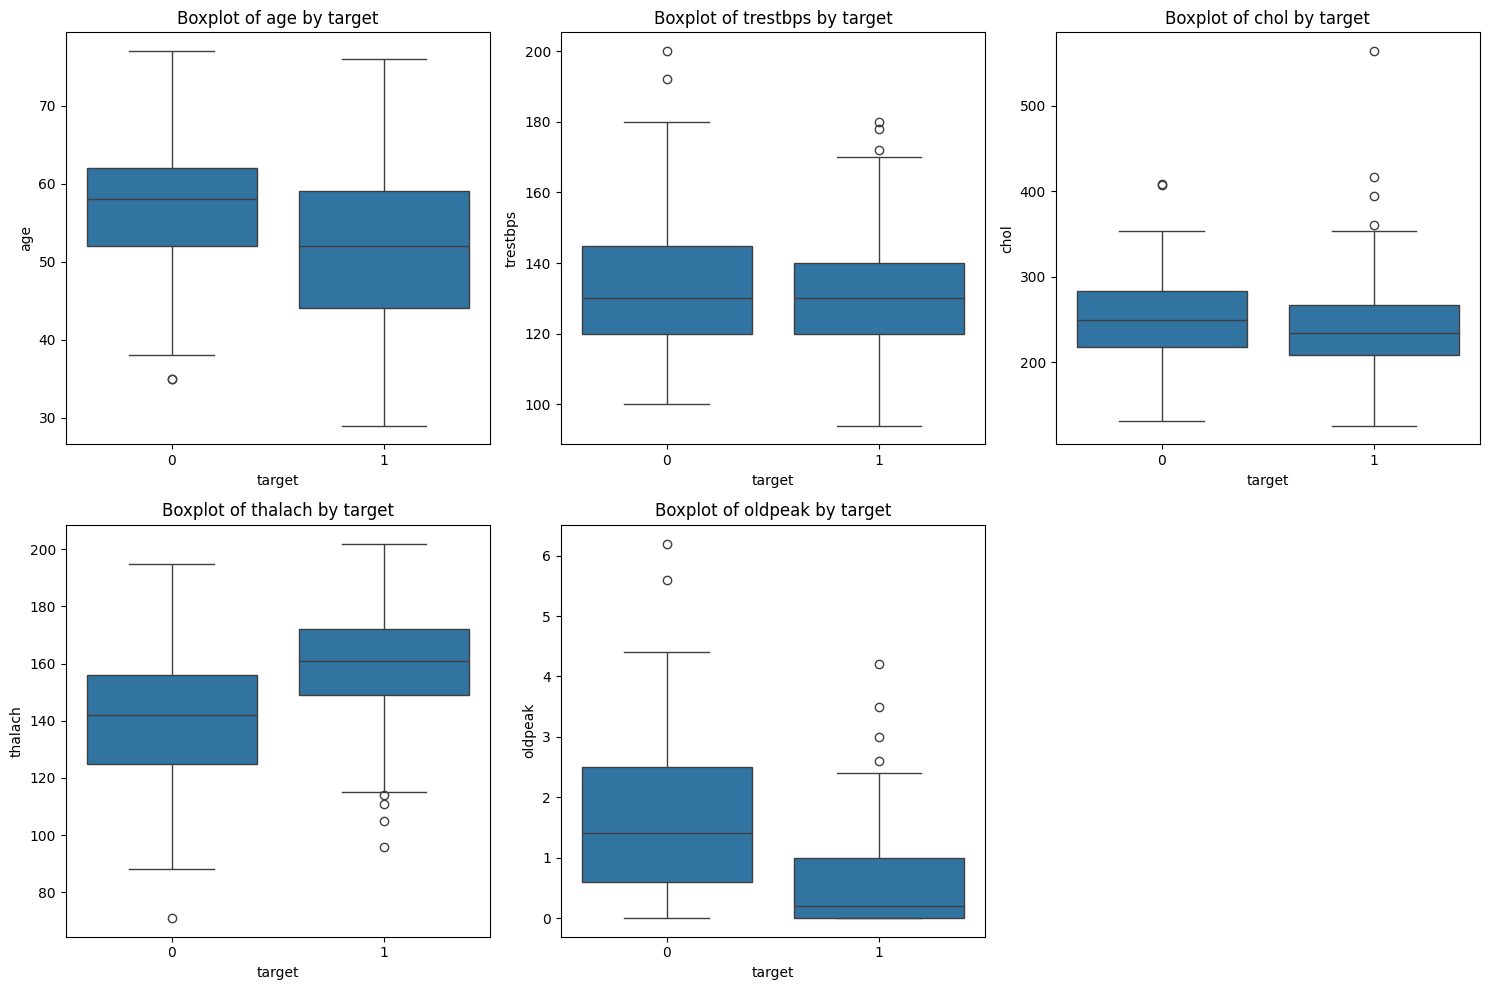

In [78]:
plot_boxplots(df_heart, heart_features, heart_target)

Age:
Both groups (with and without heart problems) have similar average ages, around mid-50s
Some younger people (under 40) were found in both groups

Resting Blood Pressure:
People without heart problems tend to have slightly higher blood pressure
Most people in both groups had normal ranges
A few people in both groups had very high blood pressure (over 180)

Cholesterol:
Both groups had similar cholesterol levels on average
Some people in both groups had very high cholesterol (over 400)

Maximum Heart Rate:
People with heart problems (Target 1) typically had higher maximum heart rates
This might be interesting to point out to your teacher as it shows a clear difference between the groups

ST Depression (a heart test measurement):
People without heart problems showed higher values
This test measures how the heart responds during exercise

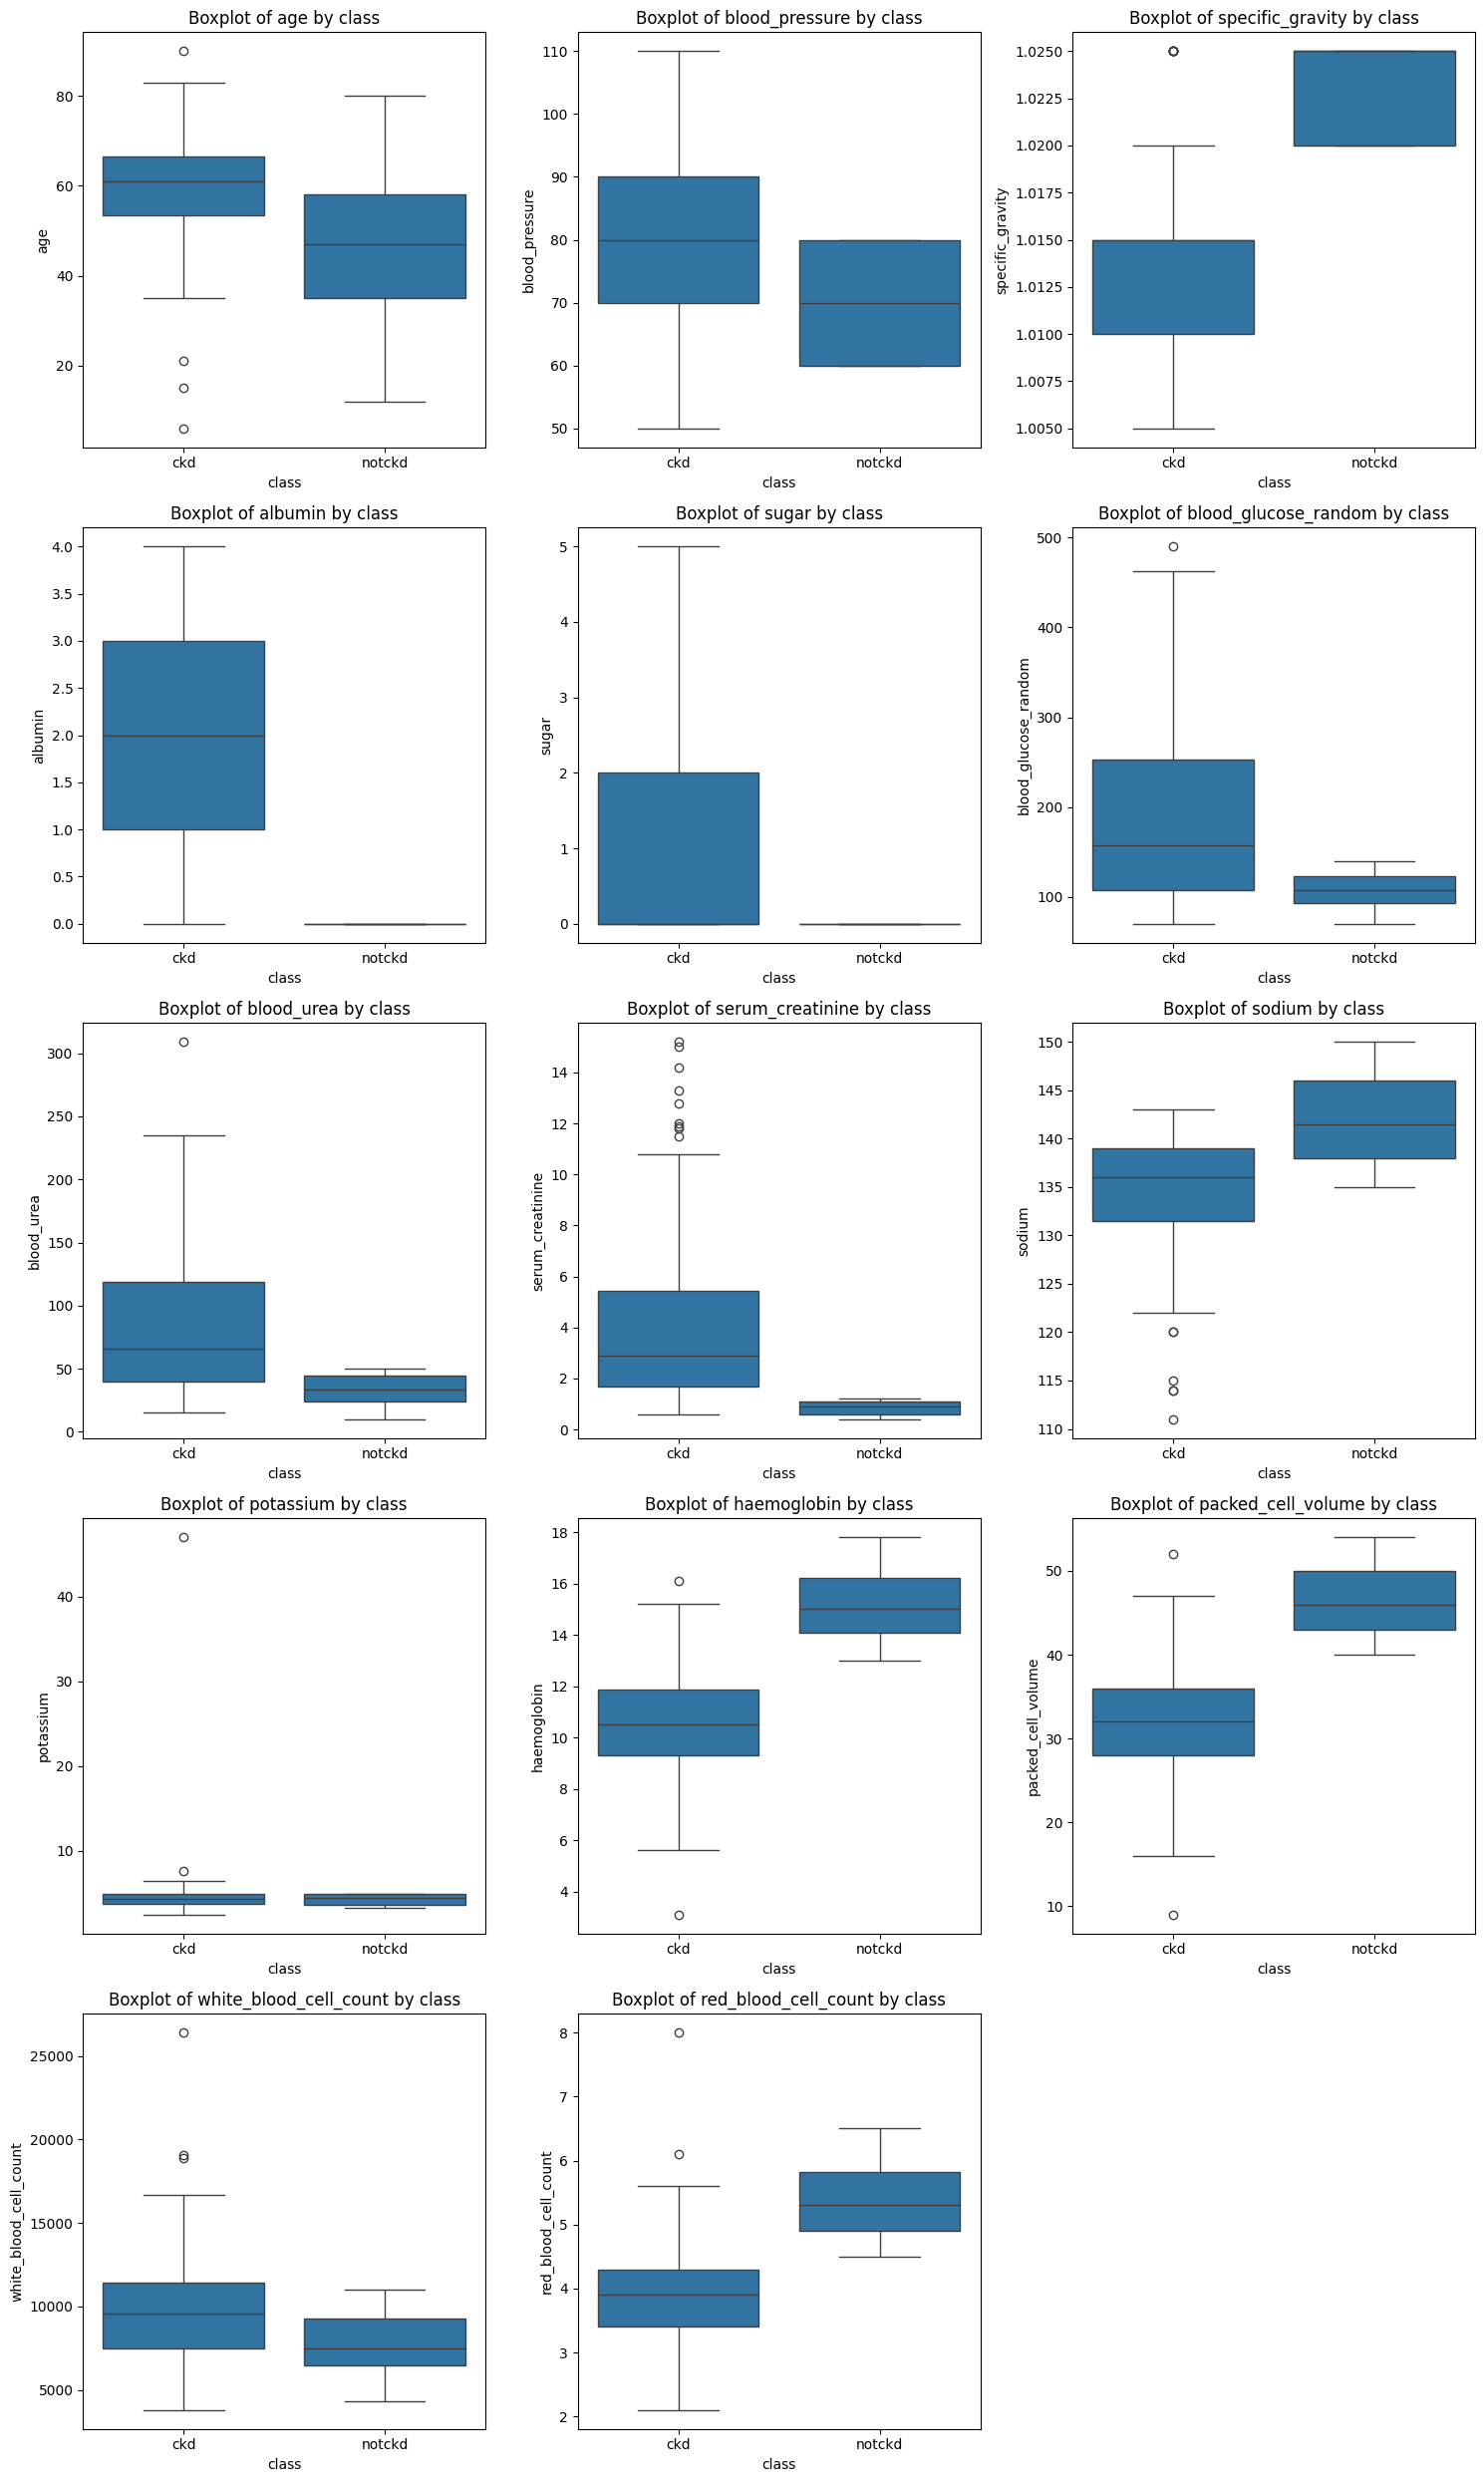

In [79]:
plot_boxplots(df_kidney, kidney_features, kidney_target)

Age: People with chronic kidney disease (ckd) tend to be older compared to those without it (notckd).

Blood Pressure: Blood pressure is generally higher in the ckd group than in the notckd group.

Specific Gravity: The specific gravity of urine is lower in the ckd group, indicating possible kidney function issues.

Albumin: Higher levels of albumin are observed in the ckd group, which is a sign of kidney damage.

Sugar: The ckd group has higher sugar levels, which could be linked to diabetes, a common cause of kidney disease.

Blood Glucose (Random): Blood glucose levels are higher in the ckd group.

Serum Creatinine: The ckd group has much higher serum creatinine levels, indicating reduced kidney function.

Sodium and Potassium: Sodium levels are slightly lower in the ckd group, while potassium levels are higher.

Hemoglobin: Hemoglobin levels are lower in the ckd group, which could indicate anemia, a common complication of kidney disease.

Packed Cell Volume: Lower packed cell volume is seen in the ckd group, consistent with anemia.

White Blood Cell Count: White blood cell counts are slightly higher in the ckd group.

Red Blood Cell Count: Red blood cell counts are lower in the ckd group, again consistent with anemia.

In [90]:
#  Select common features for correlation analysis
common_features = ['age', 'blood_pressure', 'glucose', 'bmi', 'cholesterol']

# Create a combined DataFrame with common features
df_diabetes_common = df_diabetes[['Age', 'BloodPressure', 'Glucose', 'BMI']].rename(columns={
    'Age': 'age',
    'BloodPressure': 'blood_pressure',
    'Glucose': 'glucose'
})

df_kidney_common = df_kidney[['age', 'blood_pressure', 'blood_glucose_random']].rename(columns={
    'blood_glucose_random': 'glucose',
})

df_heart_common = df_heart[['age', 'trestbps', 'chol']].rename(columns={
    'trestbps': 'blood_pressure',
    'chol': 'cholesterol'
})

# Combine the datasets into one DataFrame
df_combined = pd.concat([df_diabetes_common, df_kidney_common, df_heart_common], ignore_index=True)


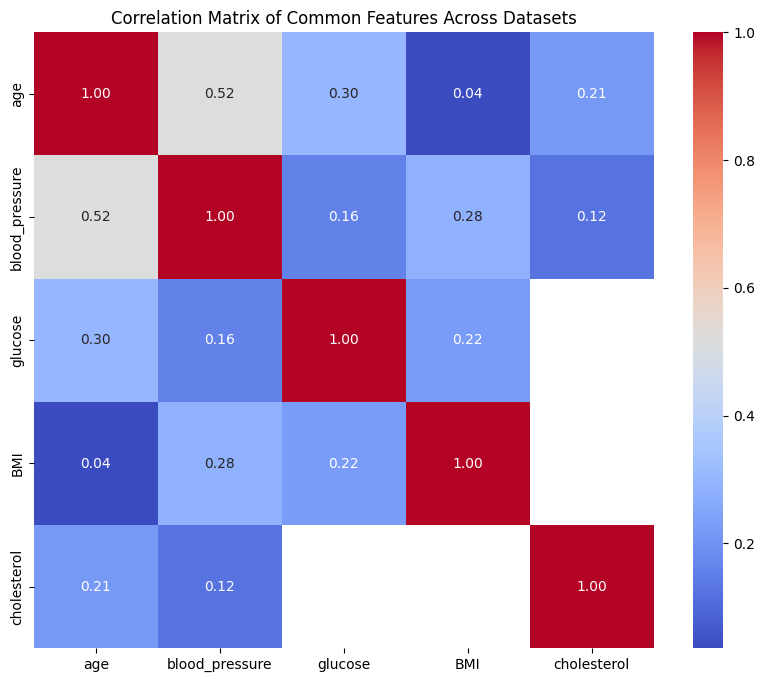

In [91]:
#Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Common Features Across Datasets")
plt.show()


The strongest positive correlation (0.52) is between age and blood pressure

Most correlations are relatively weak (below 0.3)

**Some notable correlations:**

Age and glucose: 0.30 This means that as people get older, their blood pressure tends to go up a bit

BMI and blood pressure: 0.28
BMI and glucose: 0.22
Age and cholesterol: 0.21

The weakest correlation is between age and BMI (0.04) this means being older doesn't necessarily mean someone will have a higher or lower BMI

The matrix uses a color scale where:

Red indicates stronger positive correlations
White/light colors indicate weak correlations
The diagonal is always 1.0 (perfect correlation with itself)

In [99]:
from scipy.stats import chi2_contingency

# Create contingency tables for each pair of diseases

# 1. Diabetes vs Kidney Disease
contingency_diabetes_kidney = pd.crosstab(df_diabetes['Outcome'], df_kidney['class'])

# Perform Chi-Square Test for Diabetes vs Kidney Disease
chi2_diabetes_kidney, p_value_diabetes_kidney, dof_diabetes_kidney, expected_diabetes_kidney = chi2_contingency(contingency_diabetes_kidney)

print("Chi-Square Test Results for Diabetes vs Kidney Disease:")
print(f"Chi-Square Statistic: {chi2_diabetes_kidney}")
print(f"P-value: {p_value_diabetes_kidney}")

if p_value_diabetes_kidney < 0.05:
    print("There is a significant association between diabetes and kidney disease (Reject H0).")
else:
    print("There is no significant association between diabetes and kidney disease (Fail to reject H0).")

# 2. Diabetes vs Heart Disease
contingency_diabetes_heart = pd.crosstab(df_diabetes['Outcome'], df_heart['target'])

# Perform Chi-Square Test for Diabetes vs Heart Disease
chi2_diabetes_heart, p_value_diabetes_heart, dof_diabetes_heart, expected_diabetes_heart = chi2_contingency(contingency_diabetes_heart)

print("\nChi-Square Test Results for Diabetes vs Heart Disease:")
print(f"Chi-Square Statistic: {chi2_diabetes_heart}")
print(f"P-value: {p_value_diabetes_heart}")

if p_value_diabetes_heart < 0.05:
    print("There is a significant association between diabetes and heart disease (Reject H0).")
else:
    print("There is no significant association between diabetes and heart disease (Fail to reject H0).")

# 3. Kidney Disease vs Heart Disease
contingency_kidney_heart = pd.crosstab(df_kidney['class'], df_heart['target'])

# Perform Chi-Square Test for Kidney Disease vs Heart Disease
chi2_kidney_heart, p_value_kidney_heart, dof_kidney_heart, expected_kidney_heart = chi2_contingency(contingency_kidney_heart)

print("\nChi-Square Test Results for Kidney Disease vs Heart Disease:")
print(f"Chi-Square Statistic: {chi2_kidney_heart}")
print(f"P-value: {p_value_kidney_heart}")

if p_value_kidney_heart < 0.05:
    print("There is a significant association between kidney disease and heart disease (Reject H0).")
else:
    print("There is no significant association between kidney disease and heart disease (Fail to reject H0).")


Chi-Square Test Results for Diabetes vs Kidney Disease:
Chi-Square Statistic: 0.0
P-value: 1.0
There is no significant association between diabetes and kidney disease (Fail to reject H0).

Chi-Square Test Results for Diabetes vs Heart Disease:
Chi-Square Statistic: 1.2273993973479975
P-value: 0.26791339013289883
There is no significant association between diabetes and heart disease (Fail to reject H0).

Chi-Square Test Results for Kidney Disease vs Heart Disease:
Chi-Square Statistic: 46.67468791144093
P-value: 8.380451544941488e-12
There is a significant association between kidney disease and heart disease (Reject H0).


**Diabetes vs. Kidney Disease:**

Chi-Square Statistic: 0.0

P-value: 1.0

Conclusion: There is no significant association between diabetes and kidney disease (Fail to reject H0).

**Diabetes vs. Heart Disease:**

Chi-Square Statistic: 1.227

P-value: 0.268

Conclusion: There is no significant association between diabetes and heart disease (Fail to reject H0).

**Kidney Disease vs. Heart Disease:**

Chi-Square Statistic: 46.675

P-value: 8.38e-12

Conclusion: There is a significant association between kidney disease and heart disease (Reject H0).

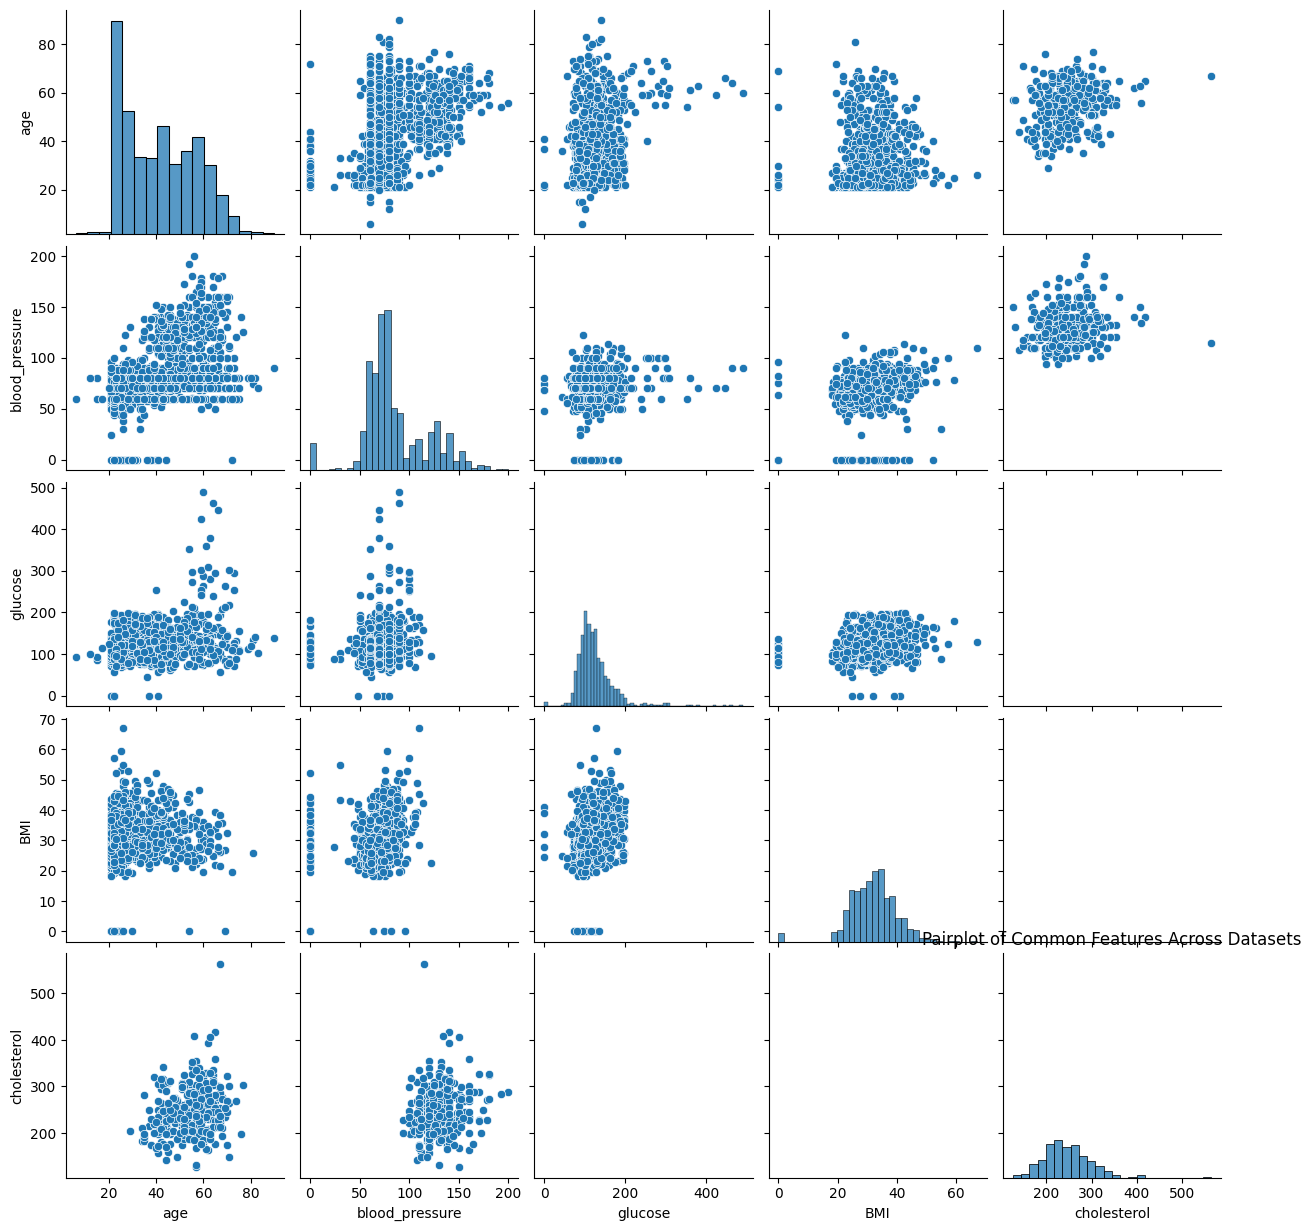

In [100]:
# Plot pairplot for common features
sns.pairplot(df_combined)
plt.title("Pairplot of Common Features Across Datasets")
plt.show()

pairplot provides an overview of the distributions and relationships between the variables. While some variables show slight correlations (e.g., Age vs. Blood Pressure, Blood Pressure vs. BMI), most relationships appear weak or nonexistent

There are only two interesting connections:

As people get older, their blood pressure tends to go up a little bit
People with higher BMI tend to have slightly higher blood pressure
For everything else, there isn't really a strong connection. For example:

Age doesn't seem to affect cholesterol much
Blood sugar levels don't really connect with any other measurement

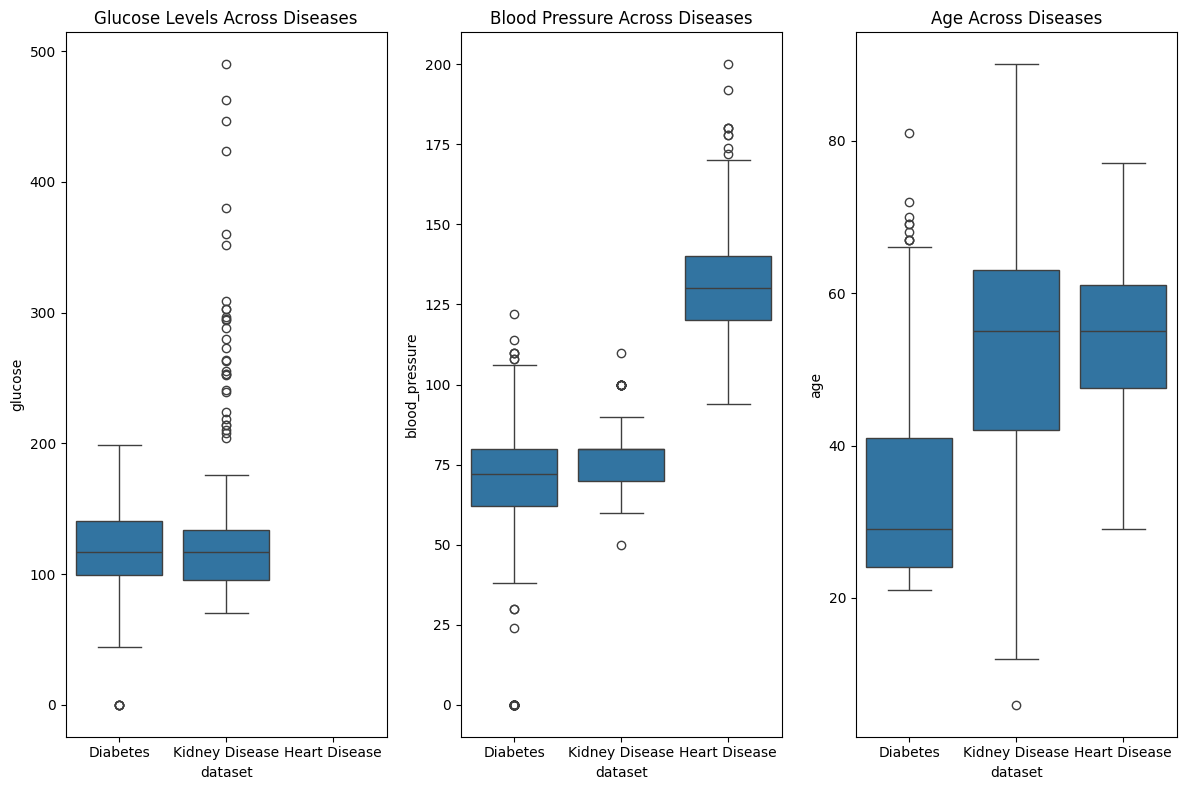

In [102]:
# Compare glucose, blood pressure, and age levels across diseases
plt.figure(figsize=(12, 8))

# Creating a combined DataFrame for glucose, blood pressure, and age
combined_data = pd.DataFrame({
    'dataset': ['Diabetes'] * len(df_diabetes) + ['Kidney Disease'] * len(df_kidney) + ['Heart Disease'] * len(df_heart),
    'glucose': list(df_diabetes['Glucose']) + list(df_kidney['blood_glucose_random']) + [None] * len(df_heart),
    'blood_pressure': list(df_diabetes['BloodPressure']) + list(df_kidney['blood_pressure']) + list(df_heart['trestbps']),
    'age': list(df_diabetes['Age']) + list(df_kidney['age']) + list(df_heart['age'])
})

# Plotting for glucose, blood pressure, and age
plt.subplot(1, 3, 1)
sns.boxplot(x='dataset', y='glucose', data=combined_data)
plt.title("Glucose Levels Across Diseases")

plt.subplot(1, 3, 2)
sns.boxplot(x='dataset', y='blood_pressure', data=combined_data)
plt.title("Blood Pressure Across Diseases")

plt.subplot(1, 3, 3)
sns.boxplot(x='dataset', y='age', data=combined_data)
plt.title("Age Across Diseases")

plt.tight_layout()
plt.show()


Diabetes is associated with high glucose levels.

heart Disease is associated with high blood pressure.

Heart Disease is associated with older age.